<a href="https://colab.research.google.com/github/TanDuong986/Detect_Order/blob/master/XLA_don_le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/tan_drive')


Mounted at /content/tan_drive


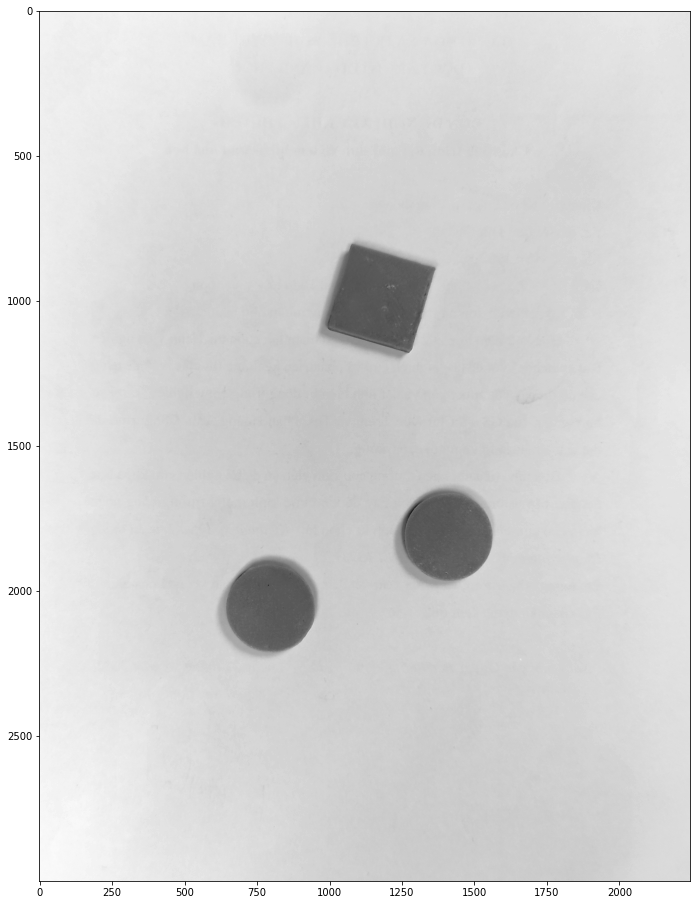

In [ ]:
# read image through command line
img = cv2.imread("/content/tan_drive/MyDrive/Sample_IP/3_le.jpg") #15 vuong tren tron, 12 tron tren vuong, 10 vuong tren vuong /content/tan_drive/MyDrive/Transfer file iphone2cpt/IMG_8608.JPG
imgg = img.copy()
h, w = int(img.shape[0]), int(img.shape[1])

ratio = w/h
start_point =(700,700) #x,y
h_cut = 3000

# start_point =(540,640) #x,y cho mau cua Thao
# h_cut = 3200

img = img[start_point[1]:start_point[1]+h_cut,start_point[0]:start_point[0]+int(h_cut*ratio)] # cut follow y:y+h,x:x+w
# img = cv2.resize(img, (w//4,h//4))
use = cv2.medianBlur(img.copy(),11)
plt.figure(figsize=(12,16))
plt.imshow(img[...,1],cmap='gray')



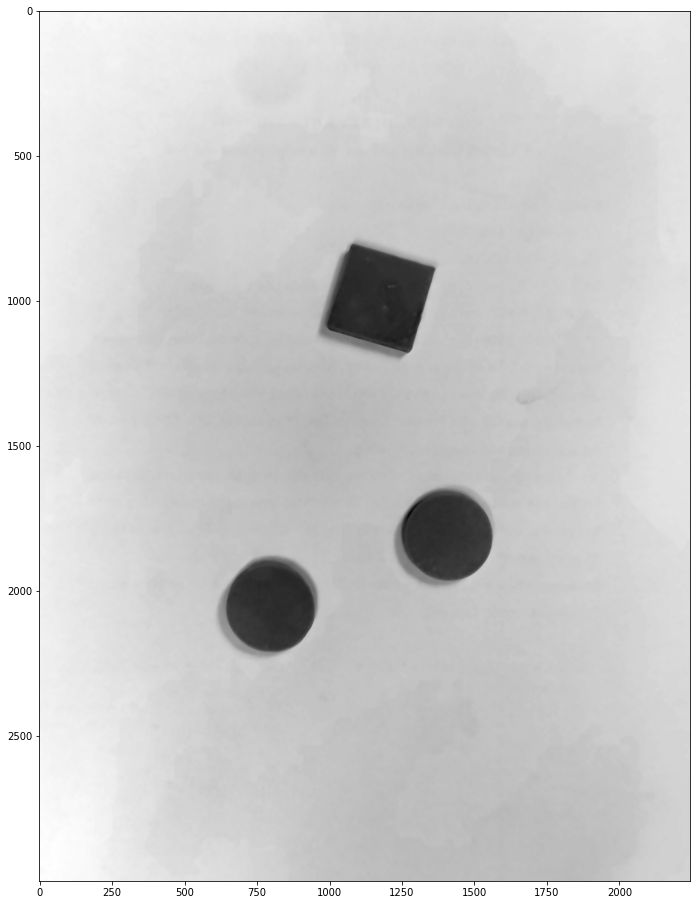

In [ ]:
# convert the image to grayscale
gray_image = use[...,0]
plt.figure(figsize=(12,16))
plt.imshow(gray_image,cmap='gray')

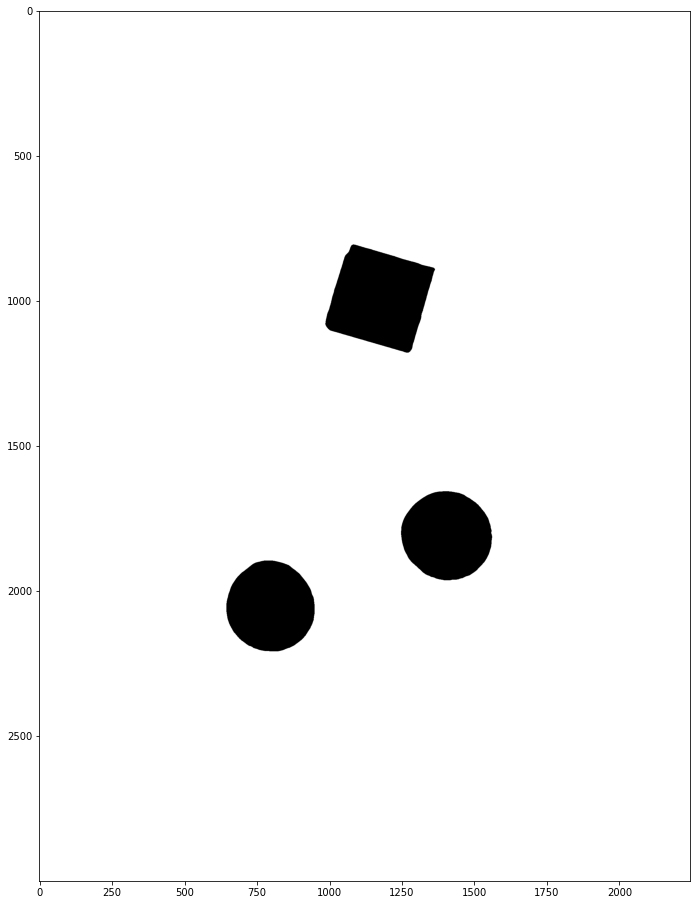

In [ ]:
# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,155,255,0)
thresh = cv2.dilate(thresh, (2,2), iterations=1)
# thresh = cv2.Canny(gray_image, 30, 200)
plt.figure(figsize=(12,16))
plt.imshow(thresh,cmap='gray')

In [ ]:
# find contours in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# for c in contours:
#   print(cv2.contourArea(c))

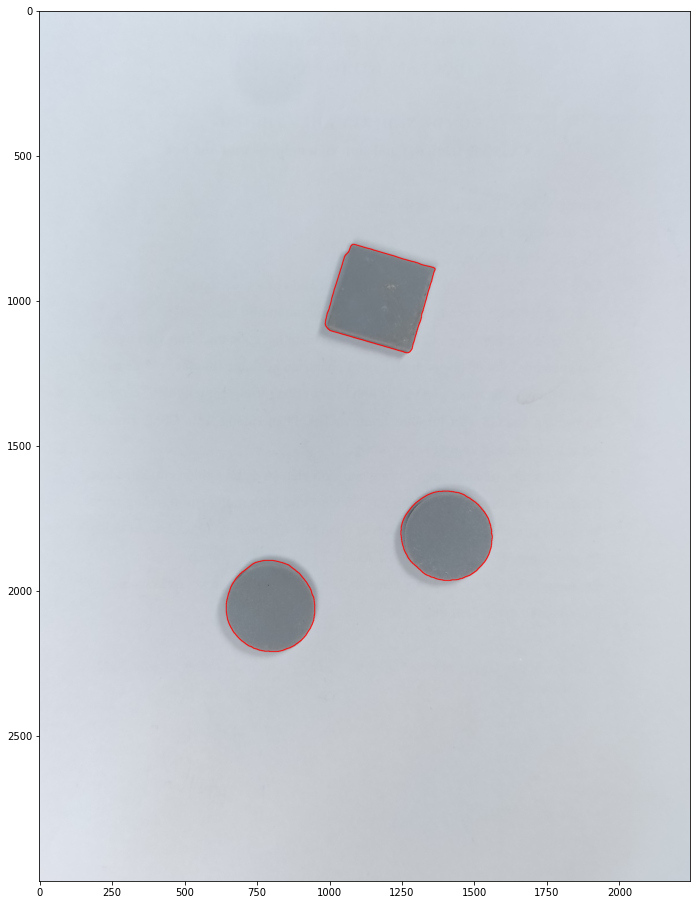

In [ ]:
cnts = [cnt for cnt in contours if cv2.contourArea(cnt) >= 50000 and cv2.contourArea(cnt) < 100000 ]
vd = img.copy()
cv2.drawContours(vd,cnts,-1,(0,0,255),2)
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(vd,cv2.COLOR_BGR2RGB))

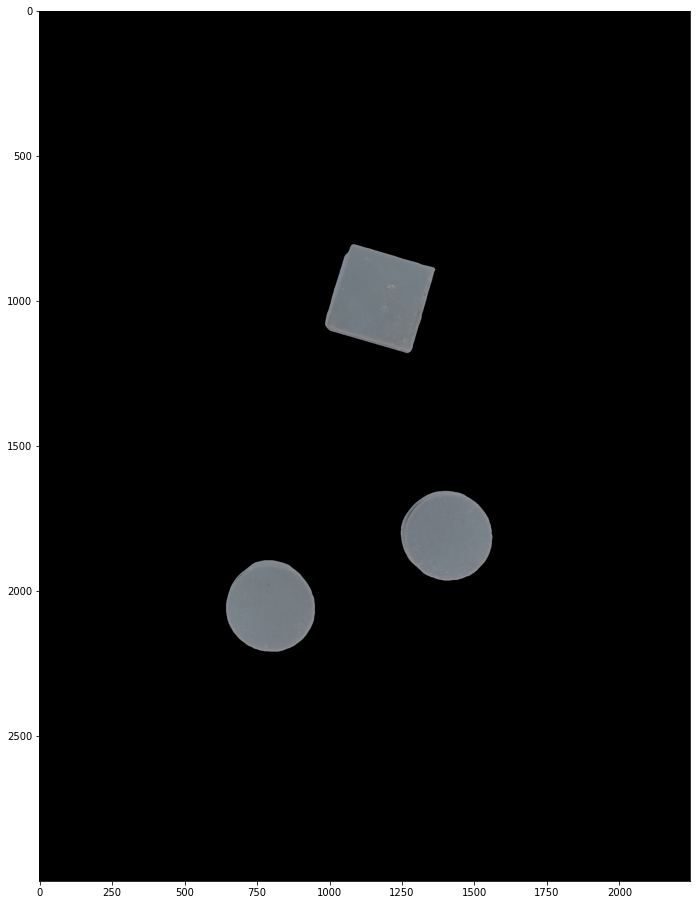

In [ ]:
mask = np.zeros_like(img)

cv2.drawContours(mask,cnts,-1,(255,255,255),-1) #draw filled contours in mask
out = np.zeros_like(img)
out[mask ==255] =img[mask==255]
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))

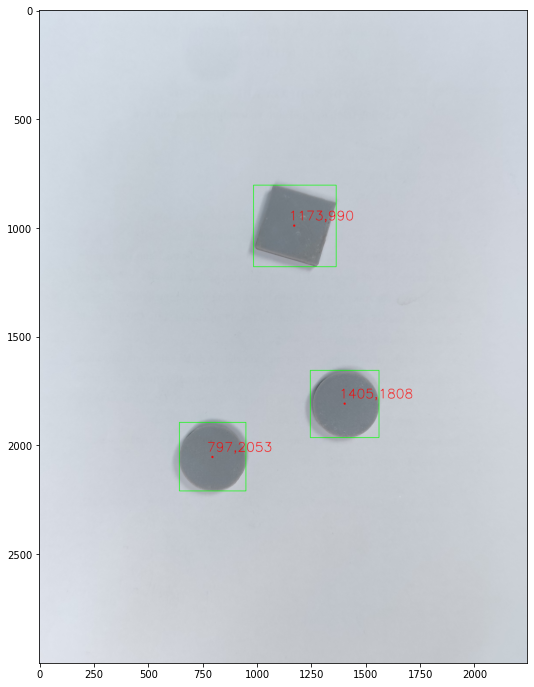

In [ ]:
final = img.copy()
new_ct = []
for c in cnts:
     # calculate moments for each contour
    (x,y,w,h) = cv2.boundingRect(c)
    # print(x,y,w,h)

    # calculate x,y coordinate of center
    if x > 0 and w > 30:
        try:
            cv2.rectangle(final, (x,y),(x+w, y+h), (0,255,0), 2)
            
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            n_x = int(cX+ start_point[0])
            n_y = int(cY+ start_point[1])
            new_ct.append((n_x,n_y))
            cv2.circle(final, (cX, cY), 5, (0, 0, 255), -1)
            cv2.putText(final, str(cX)+","+str(cY), (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
        except:
            continue
plt.figure(figsize=(9,12))
plt.imshow(cv2.cvtColor(final,cv2.COLOR_BGR2RGB))

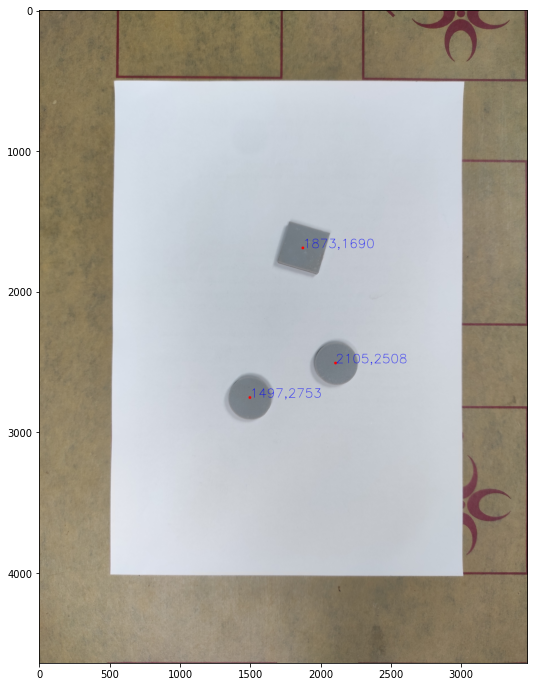

In [ ]:
for i in range(len(new_ct)):
  cv2.circle(imgg, new_ct[i], 10, (0, 0, 255), -1)
  cv2.putText(imgg, str(new_ct[i][0])+","+str(new_ct[i][1]), new_ct[i],cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2)
plt.figure(figsize=(9,12))
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))

<font size="12px">Detect <code> Retangle </code> </font>

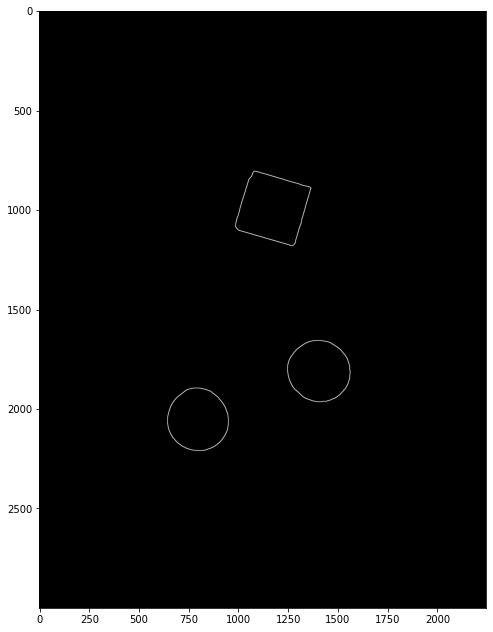

In [ ]:
import math
mask_white = np.zeros_like(img).astype(np.uint8)
cv2.drawContours(mask_white,cnts,-1,(255,255,255),2)
# mask_white = cv2.dilate(mask_white,None,iterations=2)
# mask_white = cv2.erode(mask_white,None,iterations=1)
mask_white = mask_white[...,0]
plt.figure(figsize=(8,12))
plt.imshow(mask_white,cmap='gray')

In [ ]:
lines = cv2.HoughLinesP(mask_white,2,np.pi/180,threshold =100,minLineLength =100,maxLineGap = 50)

12


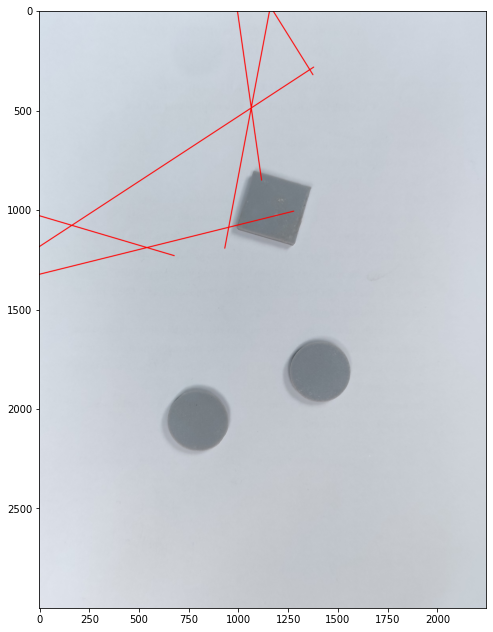

In [ ]:
lines = cv2.HoughLinesP(mask_white,1,np.pi/180,threshold =100,minLineLength =100,maxLineGap = 50)

line_img = img.copy()
if lines is not None:
  for i in range(0,len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(line_img, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
  print(len(lines))
plt.figure(figsize=(8,12))
plt.imshow(cv2.cvtColor(line_img,cv2.COLOR_BGR2RGB))



<br>

<font size="8px">New method </font>
<br>
<br><br><br>
